1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalue: [1.98248402e+01 4.82972180e-16 2.74348739e+00]
Normalised eigenvector: [[-0.08354462  0.81649658 -0.57127369]
 [-0.6161199   0.40824829  0.67359454]
 [-0.78320915 -0.40824829 -0.46895284]]
U
: [[-0.08354462  0.57127369 -0.81649658]
 [-0.6161199  -0.67359454 -0.40824829]
 [-0.78320915  0.46895284  0.40824829]]
Spectrum (D)
: [1.98248402e+01 2.74348739e+00 9.83855594e-16]
V
: [[-0.08354462 -0.6161199  -0.78320915]
 [ 0.57127369 -0.67359454  0.46895284]
 [ 0.81649658  0.40824829 -0.40824829]]


Percent of variability, main component: 87.8436389493752
Percent of variability, two features: 1.0




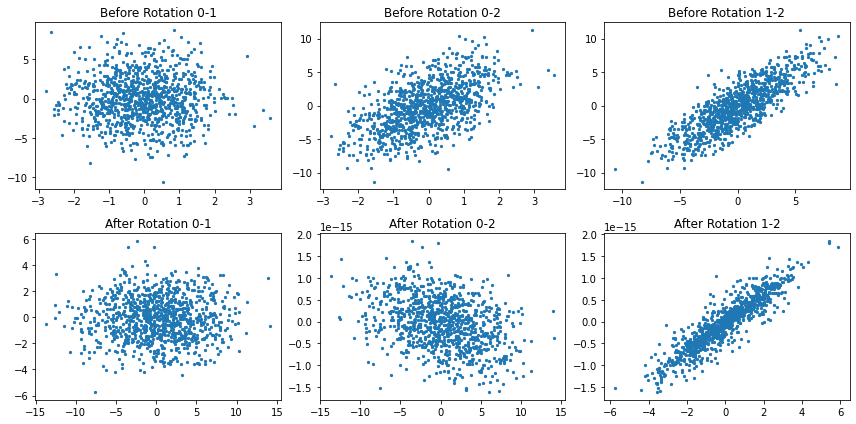

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#Random variables for the first one
N = 1000
mu = 0
sigma = 1
#Random variables for the second one
x1 = np.random.normal(loc = mu, scale = sigma, size = N)
mu2 = 0
sigma2 = 3
x2 = np.random.normal(loc=mu2, scale = sigma2, size = N)

x3 = 2*x1+x2
X = [x1, x2, x3]
#reducing dimension 
C = np.cov(X)
l,V = np.linalg.eig(C)

print("Eigenvalue:", l)
print("Normalised eigenvector:", V)

U, spectrum, V = la.svd(C)
print("U\n:", U)
print("Spectrum (D)\n:", spectrum)
print("V\n:", V)
print("\n")
main_component = spectrum[0]/spectrum.sum()
print("Percent of variability, main component:", main_component*100)
per_tf = (spectrum[0]+spectrum[1]) /spectrum.sum()
print("Percent of variability, two features:", per_tf)
print("\n")
# plotting profile plots of x with the new coordinates
Xp = np.dot(V, X)
fig, axes = plt.subplots(nrows=2, ncols=3,
                               figsize=(12, 6))

[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes
#print the graphs
ax01.scatter(X[0], X[1], s= 5)
ax01.set_title('Before Rotation 0-1')
ax02.scatter(X[0], X[2], s= 5)
ax02.set_title('Before Rotation 0-2')
ax03.scatter(X[1], X[2], s= 5)
ax03.set_title('Before Rotation 1-2')

ax11.scatter(Xp[0], Xp[1], s= 5)
ax11.set_title('After Rotation 0-1')
#axs[1,0].set_ylim(-10,10)
ax12.scatter(Xp[0], Xp[2], s= 5)
ax12.set_title('After Rotation 0-2')
ax13.scatter(Xp[1], Xp[2], s= 5)
ax13.set_title('After Rotation 1-2')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigen-decomposition:
Eigenvalues:
 [1.98417954e+01 3.95075804e-03 2.74694440e+00]
Eigenvectors:
 [[-0.08239506  0.81538782 -0.57302161]
 [-0.61677139  0.40991744  0.67198269]
 [-0.78281805 -0.40879139 -0.46913271]]

With SVD:
Eigenvalues:
 [1.98642091e+01 2.75379090e+00 3.95842305e-03]
Eigenvectors:
 [[-0.08279303  0.57289377 -0.81543733]
 [-0.61627593 -0.67246344 -0.40987424]
 [-0.78316619  0.46859967  0.40873593]]

Percentage variability gained by the three components:
 [8.78239595e+01 1.74868860e-02 1.21585536e+01]
99.98251311401823


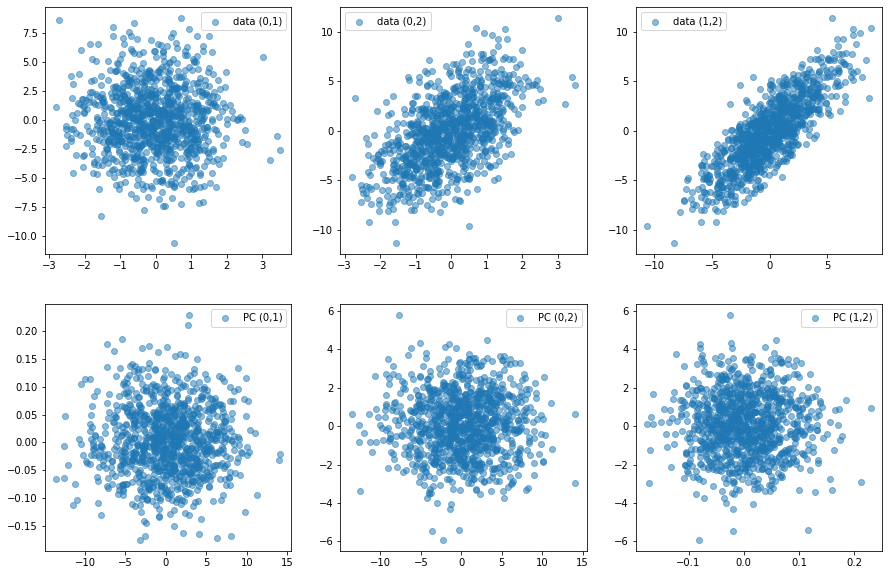

In [2]:
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = X + np.sum(noises, axis = 2)

#Dimension reducing using PCA
cov1 = np.cov(x_noise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
U1, S1, Vt1 = la.svd(x_noise)
l_svd1 = S1**2/(N-1)
V_svd1 = U1

print('Eigen-decomposition:\nEigenvalues:\n',l1)
print('Eigenvectors:\n', V1)
print('\nWith SVD:\nEigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)

Lambda = np.diag(l1)
print('\nPercentage variability gained by the three components:\n',
       (l1/Lambda.trace())*100)

print((np.sum(l1[[0,2]])/Lambda.trace())*100)

x_new1 = np.dot(V1.T,x_noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs[0,0].scatter(x_noise[0,:],x_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(x_noise[0,:],x_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(x_noise[1,:],x_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(x_new1[0,:],x_new1[1,:], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(x_new1[0,:],x_new1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(x_new1[1,:],x_new1[2,:], alpha=0.5, label='PC (1,2)')
axs[1,2].legend()

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [4]:
import pandas as pd

file = 'magic04.data'
data = pd.read_csv(file, header=None)

F = data.to_numpy()
F = F[0:,0:10]
F = np.asarray(F,dtype='float32')

# Matrix transposition and coverangince
F = F.T
C = np.cov(F)

l, V  = la.eig(C) 
l = np.real_if_close(l)

Fp = np.dot(V.T, F) 

lam = np.diag(l)

for i in range(len(l)):
    print('The selected component : ' + str(i) +'. With this component %.2f%% of the total variability gained' % (100*abs((lam[i,i]/lam.trace()))))

#Sorting eigenvalues in ascending order.
sort_l = np.sort(l) 
#Reversing the vector
sort_l = sort_l[::-1] 

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1

The selected component : 0. With this component 44.05% of the total variability gained
The selected component : 1. With this component 25.80% of the total variability gained
The selected component : 2. With this component 13.50% of the total variability gained
The selected component : 3. With this component 8.88% of the total variability gained
The selected component : 4. With this component 4.08% of the total variability gained
The selected component : 5. With this component 2.90% of the total variability gained
The selected component : 6. With this component 0.79% of the total variability gained
The selected component : 7. With this component 0.00% of the total variability gained
The selected component : 8. With this component 0.00% of the total variability gained
The selected component : 9. With this component 0.00% of the total variability gained
